### Logistic Regression

In [50]:
### Import the required packages
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [12]:
### Loading the dataset
df=pd.read_csv('https://raw.githubusercontent.com/Premalatha-success/Supervised-Learning/main/titanic-training-data.csv')

In [13]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [14]:
df.shape

(891, 12)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Analyse the Data

<AxesSubplot:xlabel='Survived', ylabel='count'>

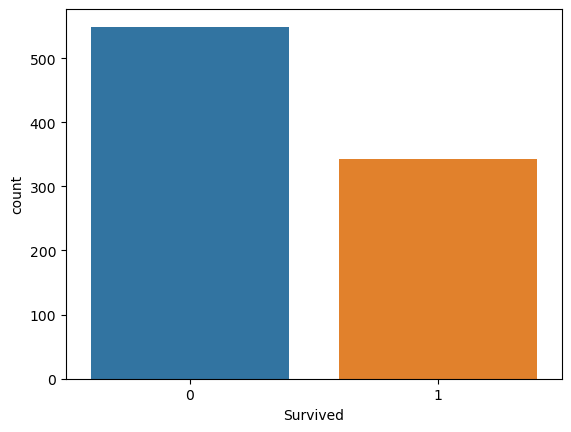

In [17]:
sns.countplot(x="Survived",data=df)

In [18]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

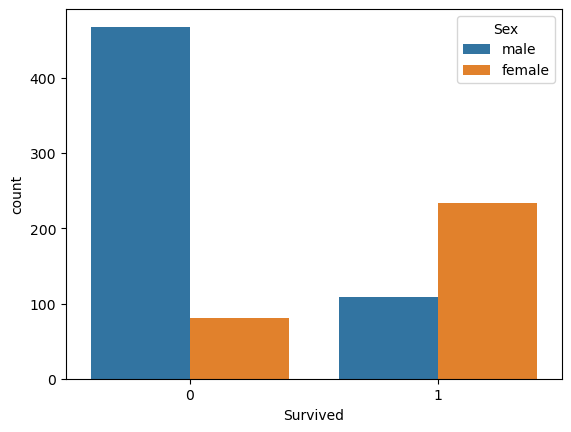

In [19]:
sns.countplot(x="Survived",hue="Sex",data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

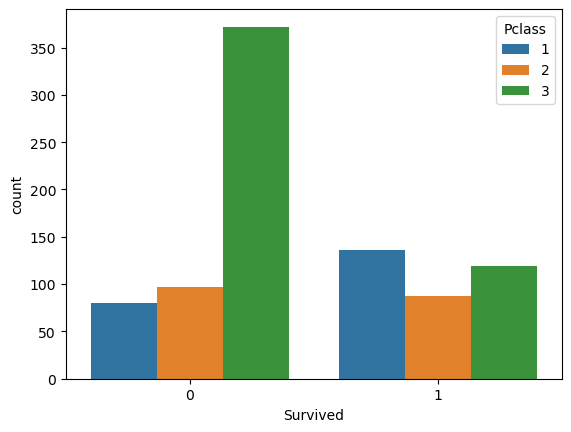

In [20]:
sns.countplot(x="Survived",hue="Pclass",data=df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

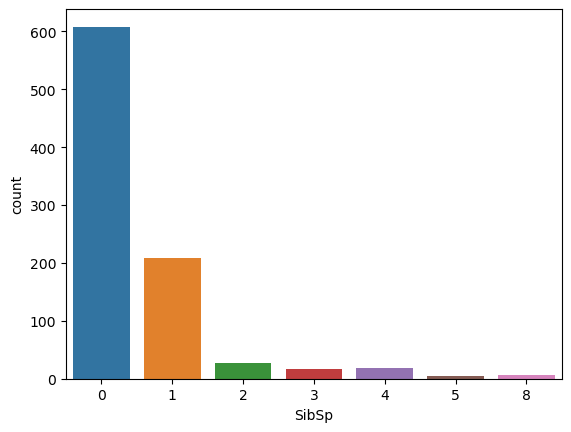

In [21]:
sns.countplot(x="SibSp",data=df)

### Data Wrangling

In [22]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

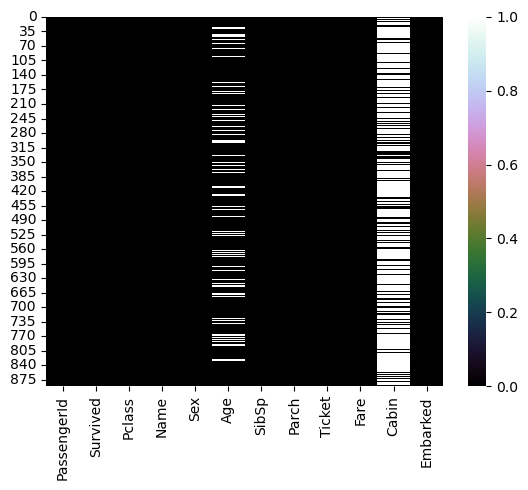

In [23]:
sns.heatmap(df.isnull(), cmap='cubehelix')


<AxesSubplot:>

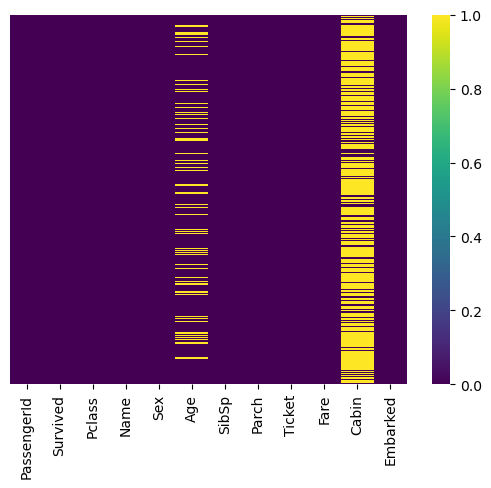

In [24]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

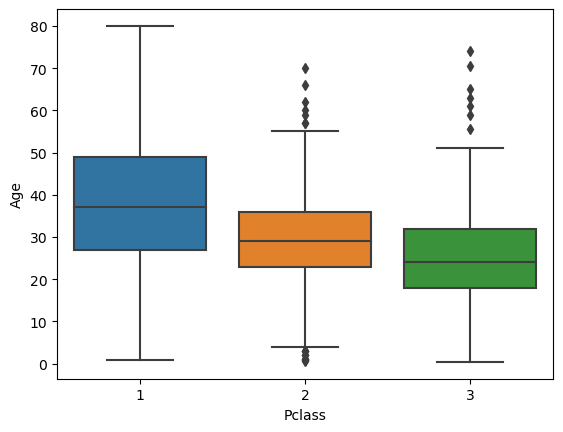

In [25]:
sns.boxplot(x="Pclass",y="Age",data=df)

In [26]:
df.drop("Cabin",axis=1,inplace=True)

In [27]:
#### Approach 1:Dropping the missing values
df.dropna(inplace=True)

<AxesSubplot:>

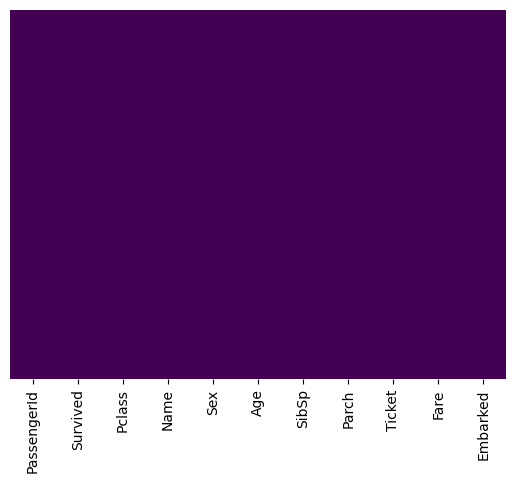

In [28]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [30]:
Sex=pd.get_dummies(df["Sex"],drop_first=True)
Sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [31]:
embark=pd.get_dummies(df["Embarked"])
embark.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [32]:
embark=pd.get_dummies(df["Embarked"],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [33]:
pcl=pd.get_dummies(df["Pclass"],drop_first=True)
pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [34]:
df=pd.concat([df,Sex,embark,pcl],axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [35]:
df.drop(["Sex","Embarked","PassengerId","Name","Ticket","Pclass","Fare"],axis=1,inplace=True)
df.head()

,Survived,Age,SibSp,Parch,male,Q,S,2,3
0,0,22.0,1,0,1,0,1,0,1
1,1,38.0,1,0,0,0,0,0,0
2,1,26.0,0,0,0,0,1,0,1
3,1,35.0,1,0,0,0,1,0,0
4,0,35.0,0,0,1,0,1,0,1


### Split the Data

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [37]:
X=df.drop("Survived",axis=1)
y=df["Survived"]

In [38]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

### Fit the Model

In [39]:
model=LogisticRegression()
model.fit(X_train,y_train)

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
predictions=model.predict(X_test)

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.794392523364486

In [42]:
from sklearn import metrics
print(metrics.classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.79      0.87      0.83       122
           1       0.80      0.70      0.74        92

    accuracy                           0.79       214
   macro avg       0.80      0.78      0.79       214
weighted avg       0.79      0.79      0.79       214



<AxesSubplot:>

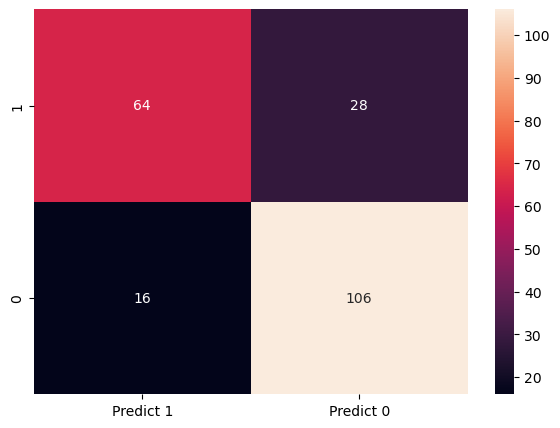

In [43]:
cm=metrics.confusion_matrix(y_test, predictions, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')


In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
mode12=DecisionTreeClassifer()
mode12.fit(X_train,y_train)
print(mode12.score(X_train,y_train))
print(mode12.score(X_test,y_test))

NameError: name 'DecisionTreeClassifer' is not defined

In [ ]:
model2_reg=DecisionTreeClassifier(max_depth=3,criterion='entropy')
mode12_reg.fit(X_train,y_train)
print(model2_reg.score(X_train,y_train))
print(model2_reg.score(X_test,y_test))

In [ ]:
### how good the model is?

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
titanic_data=pd.read_csv("titanic-training-data.csv")

In [ ]:
titanic_data["Sex"] = titanic_data["Sex"].astype('category').cat.codes
titanic_data["Embarked"] = titanic_data["Embarked"].astype('category').cat.codes
titanic_data.dtypes

In [ ]:
#### Missing Value imputation
mean_value=titanic_data['Age'].mean()
titanic_data['Age']=titanic_data['Age'].fillna(mean_value)

titanic_data[['Cabin']]=np.where(titanic_data[['Cabin']].isnull(), 0, 1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import svm

In [ ]:
target = 'Survived'
X = titanic_data.drop(['PassengerId','Survived','Name','Ticket'],axis=1)
y=titanic_data[target]

X_train, X_test, y_train, y_test = train_test_split(X.values,y,test_size=0.50,random_state=123, stratify=y)

In [ ]:
clf_svm=svm.SVC(kernel='linear', C=1)

In [ ]:
clf_svm

In [ ]:
clf_svm.fit(X_train,y_train)

In [ ]:
clf_svm.score(X_test, y_test)

In [51]:
import graphviz 
from sklearn import tree

from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassfier
import pydotplus


ModuleNotFoundError: No module named 'graphviz'

In [ ]:
clf_tree = tree.DecisionTreeClassifier()
clf_tree = clf_tree.fit(X_train, y_train)

In [ ]:
clf_tree.score(X_test, y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf_random = RandomForestClassifier(n_estimators=20, max_depth=None,
     min_samples_split=7, random_state=0)

In [ ]:
clf_random.fit(X_train,y_train)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=7,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

clf_random.score(X_test, y_test)